<a href="https://colab.research.google.com/github/MilanCugur/Offline_Writer_Identification/blob/master/NIST_DataUtil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!rm -r ./sample_data/

In [0]:
!df

In [0]:
import os
from zipfile import ZipFile

# Extract data

In [0]:
%%time

path = "drive/My Drive/HMath/NIST/by_write.zip"
archive = ZipFile(path, 'r')
archive.extractall('./')  
archive.close()

CPU times: user 1min 22s, sys: 38.2 s, total: 2min
Wall time: 2min 25s


In [0]:
del archive

In [0]:
%%time

path = "drive/My Drive/HMath/NIST/by_class.zip"
archive = ZipFile(path, 'r')
archive.extractall('./')  
archive.close()

CPU times: user 2min 36s, sys: 1min 15s, total: 3min 52s
Wall time: 5min 6s


In [0]:
del archive

# Create InfoDisk.txt (image, label, writer)

In [0]:
%%time

Info = []  # Info is a list of pairs: (path_to_image, label, writer_id); It could be a dictionary!

for root, dirs, files in os.walk("./by_class"):
  for file in files:
    if file.endswith('.mit'):
      with open(os.path.join(root, file)) as f:
        for l in f.readlines()[1:]:  # Maybe to use first number in file as control sum; TODO
          x, y = l.rstrip('\n').split(' ')
          Info.append((y, root.split('/')[2], (y.split('/')[0]).split('_')[0]))  

CPU times: user 2.55 s, sys: 752 ms, total: 3.31 s
Wall time: 3.99 s


In [0]:
len(Info)

814255

In [0]:
Info[23430:23435]  # Small redundancy; Never mind :)

[('f2471_82/d2471_82/d2471_82_00070.png', '32', 'f2471'),
 ('f2471_82/d2471_82/d2471_82_00071.png', '32', 'f2471'),
 ('f2471_82/d2471_82/d2471_82_000109.png', '32', 'f2471'),
 ('f2472_83/d2472_83/d2472_83_00004.png', '32', 'f2472'),
 ('f2472_83/d2472_83/d2472_83_00015.png', '32', 'f2472')]

(128, 128, 3)


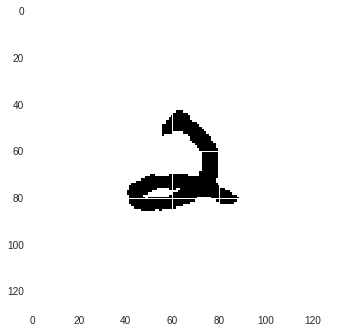

In [0]:
from skimage import color
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

check_path = './by_write/hsf_4/f2471_82/d2471_82/d2471_82_00070.png'  # 2
img = io.imread(check_path)
print(img.shape)
plt.imshow(img)
plt.show()

# Write file to disc

In [0]:
%%time 

InfoDisk = "./InfoDisk.txt"
with open(InfoDisk, "w") as file:
  for l in Info:
    file.write(l[0]+' '+l[1]+' '+l[2]+'\n')  # (imgpath, label, writer)

CPU times: user 503 ms, sys: 92.6 ms, total: 596 ms
Wall time: 599 ms


In [0]:
!cp ./InfoDisk.txt './drive/My Drive/HMath/NIST/InfoDisk.txt'

In [0]:
del Info
!rm ./InfoDisk.txt

# Create Folder ImgDisc

In [0]:
from skimage.io import imread, imsave
from skimage.transform import resize
from skimage.color import rgb2gray

In [0]:
%%time

ImgDisk = './ImgDisk'
if not os.path.exists(ImgDisk):
  os.makedirs(ImgDisk)

for root, dirs, files in os.walk("./by_write"):
  for d in dirs:
    if d[0] == 'h':
      continue
    elif d[0] == 'f':
      tmppath = os.path.join(ImgDisk, d)
      if not os.path.exists(tmppath):
        os.makedirs(tmppath)
    elif d[0] in ['d', 'l', 'u', 'c']:
      mediumpath = root.split('/')[-1]
      tmppath = os.path.join(os.path.join(ImgDisk, mediumpath), d)
      if not os.path.exists(tmppath):
        os.makedirs(tmppath)
    else:
      raise Exception('Invalid folder in directory \"by_write\"')
    
  
  for f in files:
    if f.endswith('.png'):
      tmp_path = os.path.join(root, f)
      tmp_path_splitted = tmp_path.split('/')
      new_path = os.path.join(ImgDisk, tmp_path_splitted[3]+'/'+tmp_path_splitted[4]+'/'+tmp_path_splitted[5])
      
      img = rgb2gray(imread(tmp_path))[32:96, 32:96]  # TODO
      imsave(new_path, img)

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:132: UserWarning: ./ImgDisk/f1386_19/c1386_19/c1386_19_00017.png is a low contrast image
  warn('%s is a low contrast image' % fname)


CPU times: user 17min 43s, sys: 3min 13s, total: 20min 56s
Wall time: 22min 58s


In [0]:
# Small test
total = 0
for root, dirs, files in os.walk("./ImgDisk"):
  for f in files:
    total += 1

print(total)

814255


In [0]:
!ls ./ImgDisk | wc -l  # Its ok! 500+500+500+598+499+500

ls: cannot access './ImgDisk': No such file or directory
0


# Write Images to Disc

In [0]:
%%time

import shutil
shutil.make_archive("CompressedImgDisk", 'zip', "ImgDisk")

CPU times: user 2min 17s, sys: 44.2 s, total: 3min 1s
Wall time: 5min 31s


In [0]:
# Verify zipping; Its Ok (No enough memory); If I delete ImgDisk I can verify this!
#path = "./CompressedImgDisk.zip"
#archive = ZipFile(path, 'r')
#archive.extractall('./DecompressedImgDisk')  
#archive.close()

In [0]:
!ls -lsh

total 92K
4.0K drwxr-xr-x    9 root root 4.0K Oct 22 17:02 by_write
4.0K drwx------    3 root root 4.0K Oct 22 16:56 drive
 84K drwxr-xr-x 3599 root root  80K Oct 22 21:20 ImgDiskAdvanced


In [0]:
!split CompressedImgDisk.zip -b 32M ZIPCHUNKS

In [0]:
!ls -lsh

total 774M
4.0K -rw-r--r--    1 root root 2.5K Oct 21 15:29 adc.json
4.0K drwxr-xr-x    9 root root 4.0K Oct 21 14:43 by_write
387M -rw-r--r--    1 root root 387M Oct 21 15:17 CompressedImgDisk.zip
4.0K drwx------    3 root root 4.0K Oct 21 14:40 drive
 84K drwxr-xr-x 3599 root root  80K Oct 21 15:01 ImgDisk
 32M -rw-r--r--    1 root root  32M Oct 21 15:57 ZIPCHUNKSaa
 32M -rw-r--r--    1 root root  32M Oct 21 15:57 ZIPCHUNKSab
 32M -rw-r--r--    1 root root  32M Oct 21 15:57 ZIPCHUNKSac
 32M -rw-r--r--    1 root root  32M Oct 21 15:57 ZIPCHUNKSad
 32M -rw-r--r--    1 root root  32M Oct 21 15:57 ZIPCHUNKSae
 32M -rw-r--r--    1 root root  32M Oct 21 15:57 ZIPCHUNKSaf
 32M -rw-r--r--    1 root root  32M Oct 21 15:57 ZIPCHUNKSag
 32M -rw-r--r--    1 root root  32M Oct 21 15:57 ZIPCHUNKSah
 32M -rw-r--r--    1 root root  32M Oct 21 15:57 ZIPCHUNKSai
 32M -rw-r--r--    1 root root  32M Oct 21 15:57 ZIPCHUNKSaj
 32M -rw-r--r--    1 root root  32M Oct 21 15:57 ZIPCHUNKSak
 32M -rw-r--r--    

In [0]:
!ls ZIPCHUNKS* 

ZIPCHUNKSaa  ZIPCHUNKSad  ZIPCHUNKSag  ZIPCHUNKSaj  ZIPCHUNKSam
ZIPCHUNKSab  ZIPCHUNKSae  ZIPCHUNKSah  ZIPCHUNKSak
ZIPCHUNKSac  ZIPCHUNKSaf  ZIPCHUNKSai  ZIPCHUNKSal


In [0]:
!cp ZIPCHUNKSaa './drive/My Drive/HMath/NIST/Data'

In [0]:
!cat ZIPCHUNKSaa ZIPCHUNKSab ZIPCHUNKSac ZIPCHUNKSad ZIPCHUNKSae ZIPCHUNKSaf ZIPCHUNKSag ZIPCHUNKSah ZIPCHUNKSai ZIPCHUNKSaj ZIPCHUNKSak ZIPCHUNKSal ZIPCHUNKSam > DecompressedImgDisk.zip

In [0]:
!diff CompressedImgDisk.zip DecompressedImgDisk.zip

# QUESTION FOR MEETING

In [0]:
!mkdir ImgDisk

./by_write/hsf_7/f4026_43/l4026_43/l4026_43_00006.png
./ImgDisk/f4026_43/l4026_43/l4026_43_00006.png


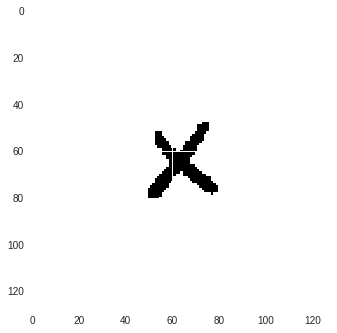

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


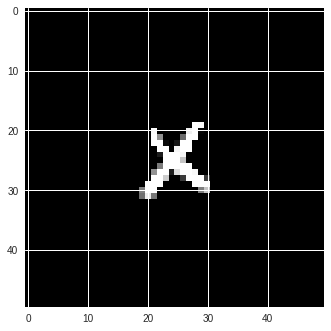

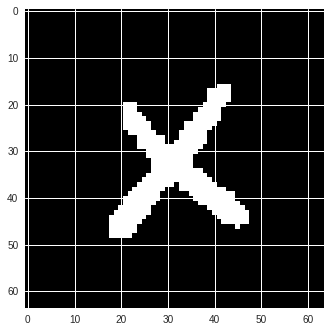

(64, 64)
./by_write/hsf_7/f4026_43/l4026_43/l4026_43_00001.png
./ImgDisk/f4026_43/l4026_43/l4026_43_00001.png


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


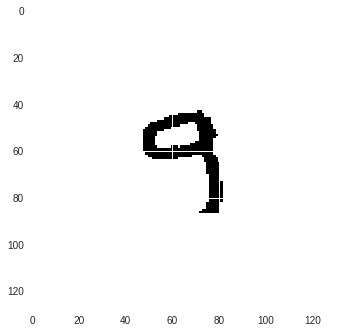

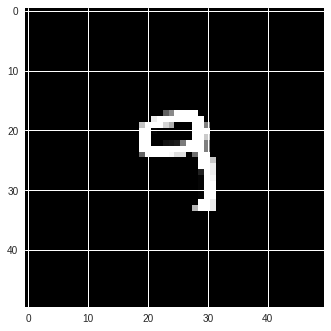

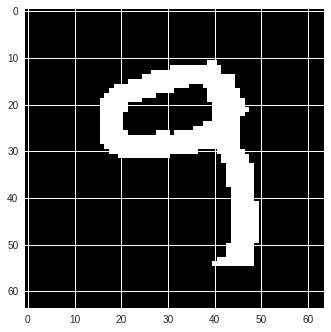

(64, 64)
./by_write/hsf_7/f4026_43/l4026_43/l4026_43_00014.png
./ImgDisk/f4026_43/l4026_43/l4026_43_00014.png


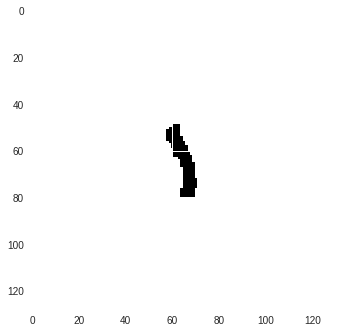

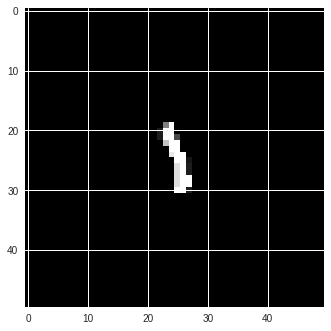

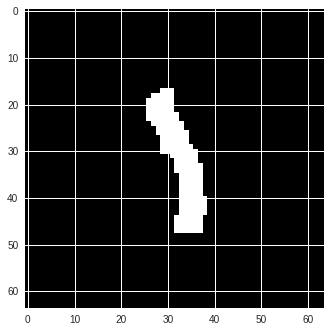

(64, 64)
./by_write/hsf_7/f4026_43/l4026_43/l4026_43_00019.png
./ImgDisk/f4026_43/l4026_43/l4026_43_00019.png


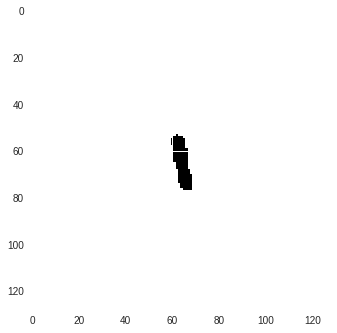

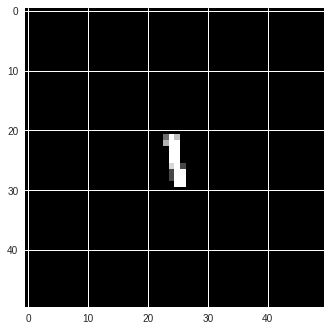

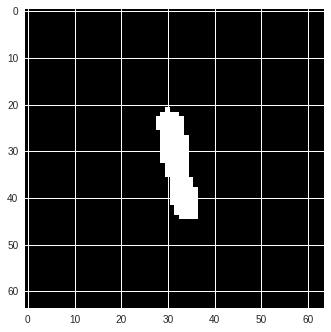

(64, 64)
./by_write/hsf_7/f4026_43/l4026_43/l4026_43_00008.png
./ImgDisk/f4026_43/l4026_43/l4026_43_00008.png


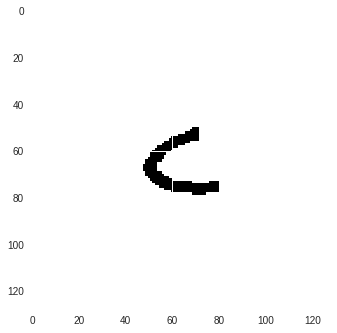

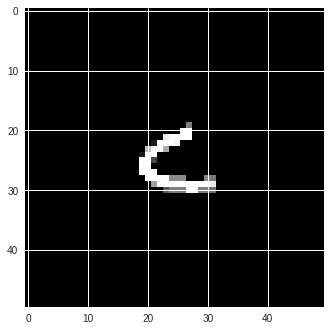

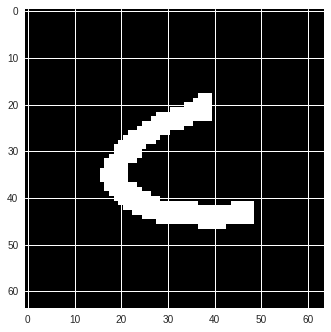

(64, 64)
./by_write/hsf_7/f4026_43/l4026_43/l4026_43_00000.png
./ImgDisk/f4026_43/l4026_43/l4026_43_00000.png


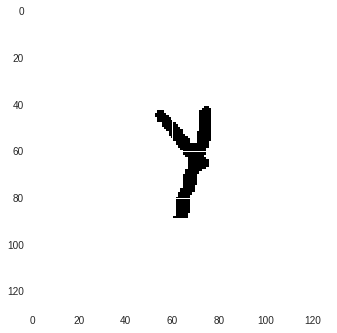

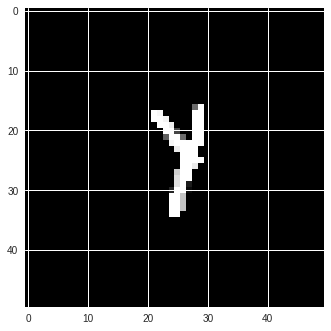

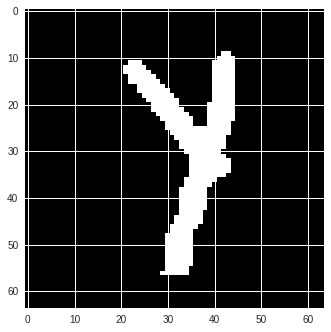

(64, 64)
./by_write/hsf_7/f4026_43/l4026_43/l4026_43_00013.png
./ImgDisk/f4026_43/l4026_43/l4026_43_00013.png


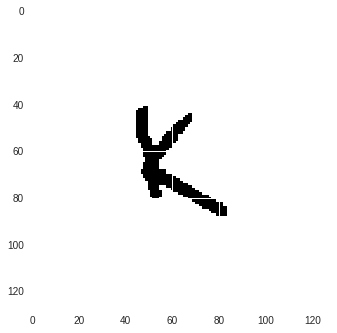

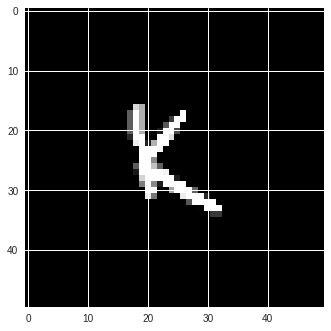

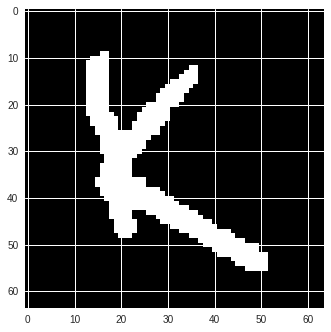

(64, 64)
./by_write/hsf_7/f4026_43/l4026_43/l4026_43_00009.png
./ImgDisk/f4026_43/l4026_43/l4026_43_00009.png


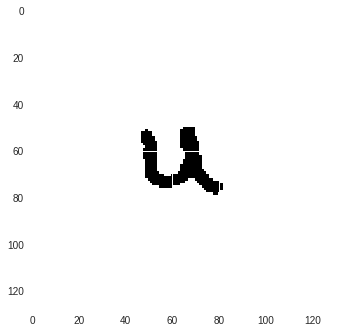

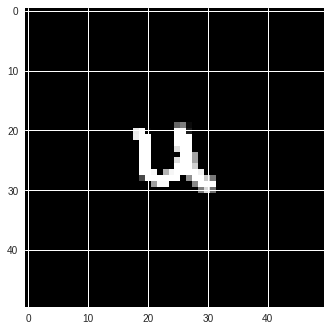

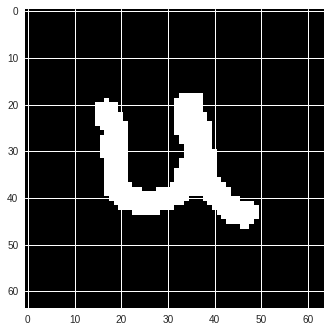

(64, 64)
./by_write/hsf_7/f4026_43/l4026_43/l4026_43_00012.png
./ImgDisk/f4026_43/l4026_43/l4026_43_00012.png


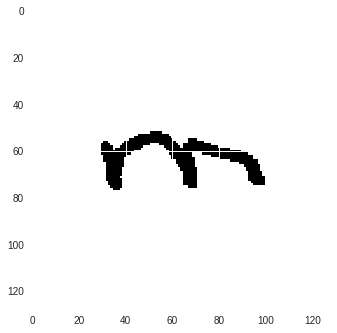

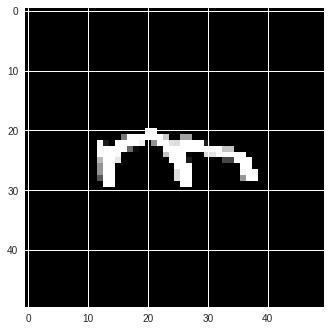

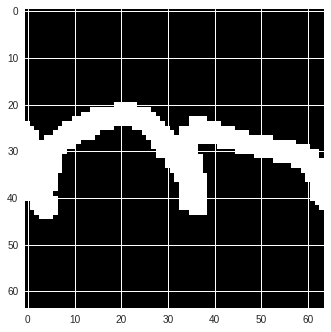

(64, 64)
./by_write/hsf_7/f4026_43/l4026_43/l4026_43_00011.png
./ImgDisk/f4026_43/l4026_43/l4026_43_00011.png


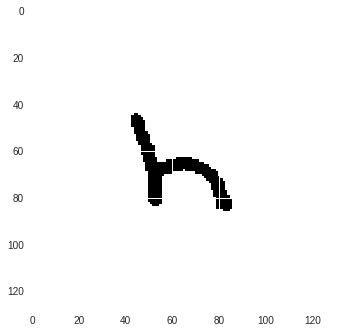

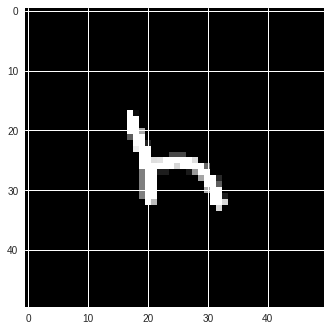

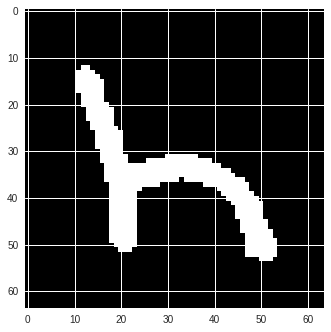

(64, 64)
./by_write/hsf_7/f4026_43/l4026_43/l4026_43_00002.png
./ImgDisk/f4026_43/l4026_43/l4026_43_00002.png


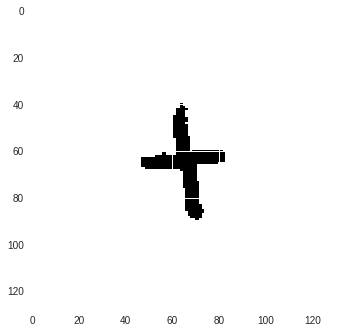

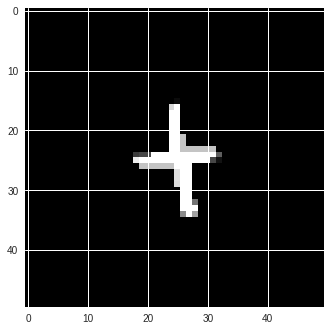

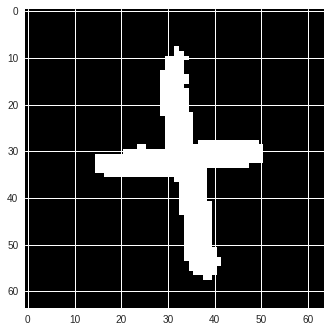

(64, 64)
./by_write/hsf_7/f4026_43/l4026_43/l4026_43_00010.png
./ImgDisk/f4026_43/l4026_43/l4026_43_00010.png


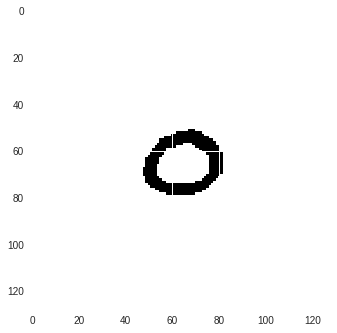

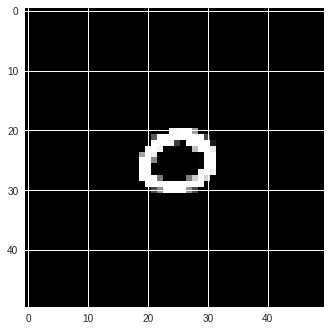

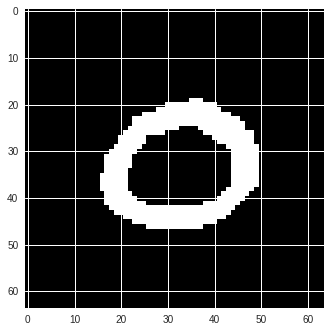

(64, 64)
./by_write/hsf_7/f4026_43/l4026_43/l4026_43_00007.png
./ImgDisk/f4026_43/l4026_43/l4026_43_00007.png


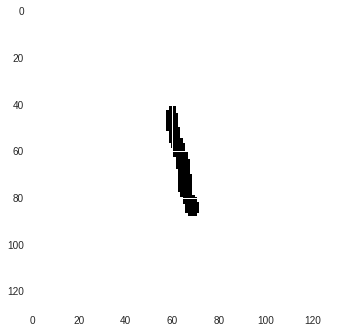

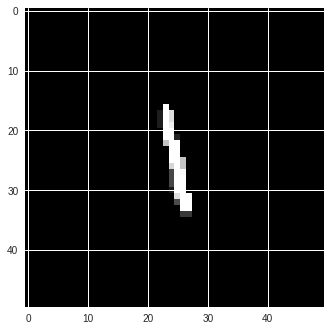

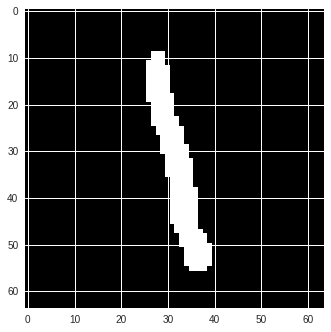

(64, 64)
./by_write/hsf_7/f4026_43/l4026_43/l4026_43_00004.png
./ImgDisk/f4026_43/l4026_43/l4026_43_00004.png


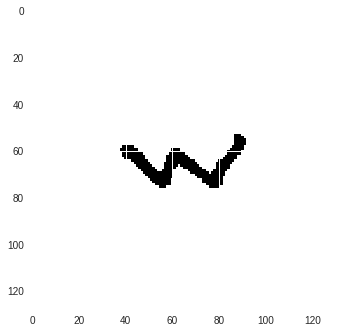

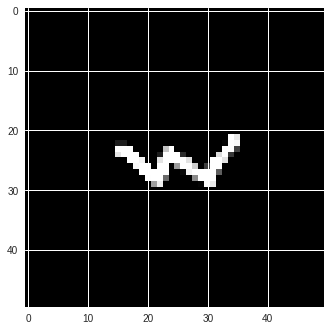

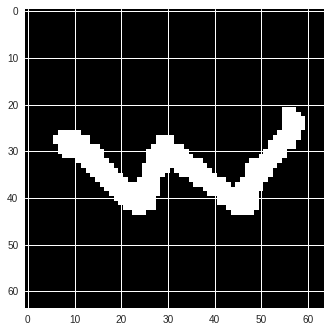

(64, 64)
./by_write/hsf_7/f4026_43/l4026_43/l4026_43_00005.png
./ImgDisk/f4026_43/l4026_43/l4026_43_00005.png


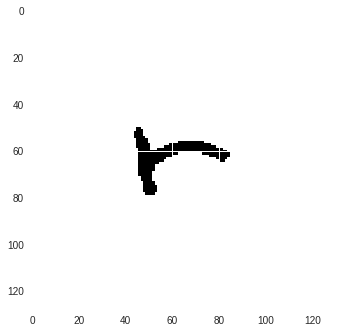

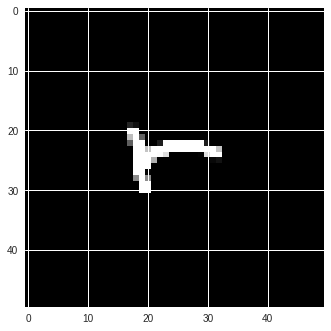

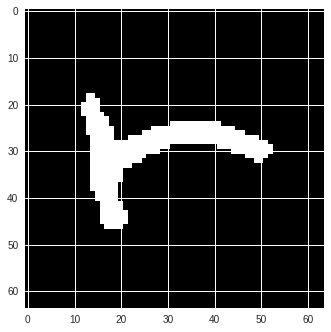

(64, 64)
./by_write/hsf_7/f4026_43/l4026_43/l4026_43_00021.png
./ImgDisk/f4026_43/l4026_43/l4026_43_00021.png


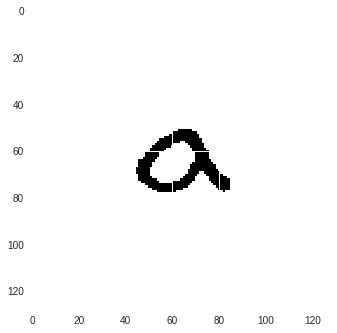

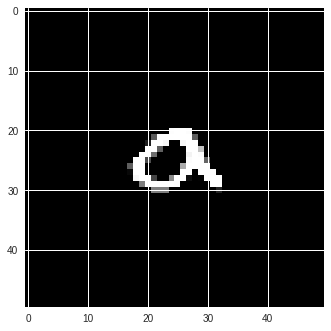

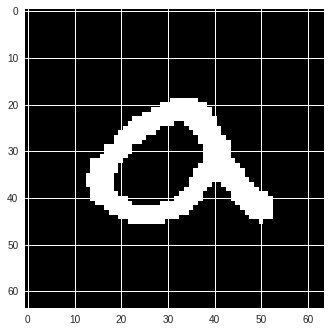

(64, 64)
./by_write/hsf_7/f4026_43/l4026_43/l4026_43_00017.png
./ImgDisk/f4026_43/l4026_43/l4026_43_00017.png


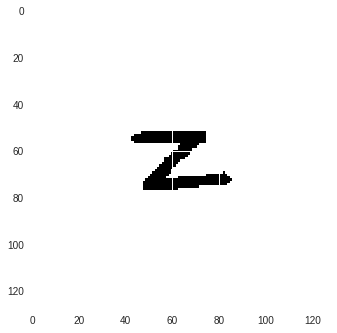

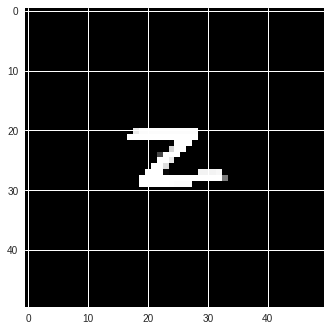

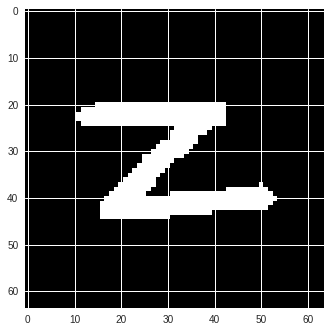

(64, 64)
./by_write/hsf_7/f4026_43/l4026_43/l4026_43_00022.png
./ImgDisk/f4026_43/l4026_43/l4026_43_00022.png


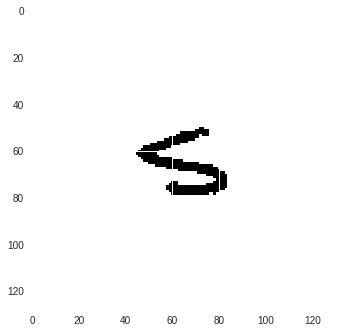

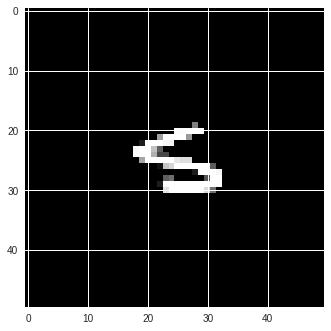

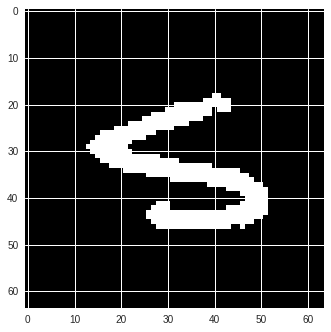

(64, 64)
./by_write/hsf_7/f4026_43/l4026_43/l4026_43_00023.png
./ImgDisk/f4026_43/l4026_43/l4026_43_00023.png


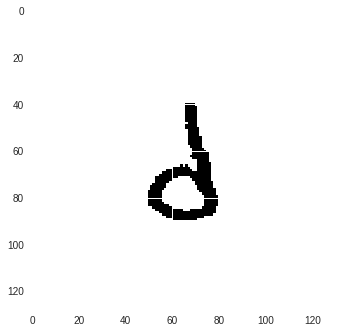

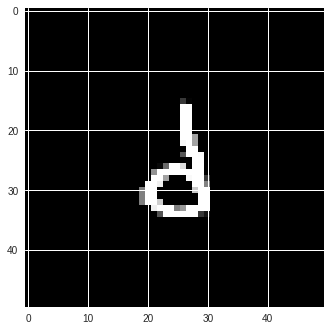

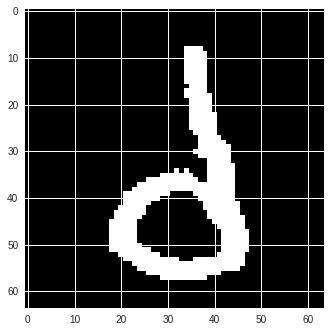

(64, 64)
./by_write/hsf_7/f4026_43/l4026_43/l4026_43_00015.png
./ImgDisk/f4026_43/l4026_43/l4026_43_00015.png


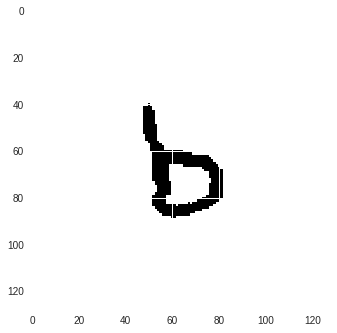

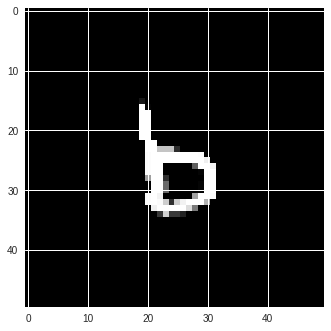

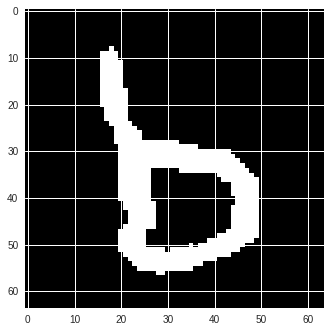

(64, 64)
20


In [0]:
from skimage import io
from matplotlib import pyplot as plt
BOX_SIZE = 50
total = 0
for root, dirs, files in os.walk("./by_write"):
  if total==20:
    break
  for f in files:
    if f.endswith('.png'):
      total += 1
      tmp_path = os.path.join(root, f)
      tmp_path_splitted = tmp_path.split('/')
      new_path = os.path.join(ImgDisk, tmp_path_splitted[3]+'/'+tmp_path_splitted[4]+'/'+tmp_path_splitted[5])
      print(tmp_path)
      print(new_path)
      ### 
      
      img = io.imread(tmp_path)
      plt.imshow(img)
      plt.show()
      
      img = rgb2gray(resize(imread(tmp_path), (BOX_SIZE, BOX_SIZE)))
      plt.imshow(img)
      plt.show()
      
      img = rgb2gray(io.imread(tmp_path))[32:96, 32:96]
      plt.imshow(img)
      plt.show()
      
      print(img.shape)
      io.imsave(new_path, img)
      
      ###
    if total==20:
      break
  
print(total)  

# Documentation (Explanation)

## Main part

In [0]:
s = 0
with open('./by_class/30/hsf_0.mit') as f:
  for l in f.readlines()[1:]:
    x, y = l.rstrip('\n').split(' ')
    print(x, y)
    s += 1
    if s==11:
      break

In [0]:
for root, dirs, files in os.walk('./drive/My Drive/ML_Cugur'):
  print('ROOT: ', root)
  print('DIRS: ', dirs)
  print('FILES: ', files)

In [0]:
s = set()
for root, dirs, files in os.walk("./by_class"):
    for f in files:
      if f.endswith('.mit'):
        s.add(root.split('/')[2])

print(sorted(s))      
print(len(s))

In [0]:
#path = 'f0000_14/d0000_14/d0000_14_00060.png'
path = 'f2129_55/u2129_55/u2129_55_00024.png'
(path.split('/')[0]).split('_')[0]

## Idea

In [0]:
%time  # Small memory test; 0.24GB -> 0.35GB

D = []
total = 0
for root, dirs, files in os.walk("./by_write"):
  for f in files:
    if f.endswith('.png'):
      D.append((f+f+f, 7, 'f4064'))
      total += 1
  
print(total)  

In [0]:
D[0:5]

In [0]:
del(D)

## Manually solution

In [0]:
Info = []  # Info is a list of pairs: (path_to_image, label, writer_id)
datafolders = ['hsf_0', 'hsf_1', 'hsf_2', 'hsf_3', 'hsf_4', 'hsf_6', 'hsf_7']
total = 0

for classfolder in os.listdir('./by_class'):
  path = os.path.join('./by_class', classfolder)             # by_class/30
  
  for datafolder in datafolders:
    innerpath_files = os.path.join(path, datafolder)         # by_class/30/hsf_0;     innerpath file names
    innerpath_linfo = os.path.join(path, datafolder+'.mit')  # by_class/30/hsf_0.mit; innerpath local info
    
    # read hash maps for writer identification
    # by_class/30/hsf_0.mit
    Linfo = {}
    with open(innerpath_linfo) as f:
      for l in f.readlines()[1:]:  # Maybe to use first number in file as control sum; TODO
        x, y = l.rstrip('\n').split(' ')
        
        
    
    
    
    # endread
    
    for file in os.listdir(innerpath_files):
      if file.endswith('.png'):
        total += 1

print(total)        